In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import LeaveOneOut, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

#########################
## Validation Datasets ##
#########################

val_1 = pd.read_csv('Evan_results_validation.csv')
val_1.columns = ['row_id', 'time', 'x', 'y', 'direction', 'congestion', 'congestion_pred_1']

val_2 = pd.read_csv('Gabriel_Ferreira_results_validation.csv')
val_2 = val_2[['row_id', 'congestion_pred']]
val_2.columns = ['row_id', 'congestion_pred_2']

val_3 = pd.read_csv('Gabriel_De_Medeiros_results_validation.csv')
val_3.columns = ['row_id', 'congestion_pred_3']

val_4 = pd.read_csv('Oscar_results_validation.csv')
val_4 = val_4[['row_id', 'congestion_pred']]
val_4.columns = ['row_id', 'congestion_pred_4']

validation = pd.merge(val_1, val_2, on = ['row_id'], how = 'left')
validation = pd.merge(validation, val_3, on = ['row_id'], how = 'left')
validation = pd.merge(validation, val_4, on = ['row_id'], how = 'left')

###################
## Test Datasets ##
###################

test_1 = pd.read_csv('Evan_results_test.csv')
test_1.columns = ['row_id', 'time', 'x', 'y', 'direction', 'congestion_pred_1']

test_2 = pd.read_csv('Gabriel_Ferreira_results_test.csv')
test_2 = test_2[['row_id', 'congestion_pred']]
test_2.columns = ['row_id', 'congestion_pred_2']

test_3 = pd.read_csv('Gabriel_De_Medeiros_results_test.csv')
test_3.columns = ['row_id', 'congestion_pred_3']

test_4 = pd.read_csv('Oscar_results_test.csv')
test_4 = test_4[['row_id', 'congestion_pred']]
test_4.columns = ['row_id', 'congestion_pred_4']

test = pd.merge(test_1, test_2, on = ['row_id'], how = 'left')
test = pd.merge(test, test_3, on = ['row_id'], how = 'left')
test = pd.merge(test, test_4, on = ['row_id'], how = 'left')

In [22]:
A = validation[(validation['direction'] == 'EB') & (validation['x'] == 0) & (validation['y'] == 0)].reset_index(drop = True) 
B = test[(test['direction'] == 'EB') & (test['x'] == 0) & (test['y'] == 0)].reset_index(drop = True) 

In [11]:
my_cv = LeaveOneOut()
my_cv

LeaveOneOut()

In [23]:
X = A[['congestion_pred_1', 'congestion_pred_2', 'congestion_pred_3', 'congestion_pred_4']]
Y = A['congestion']

## Defining leave-one-out cross validation
my_cv = LeaveOneOut().split(X)
my_cv

<generator object BaseCrossValidator.split at 0x7f9e1f555200>

In [47]:
X = A[['congestion_pred_1', 'congestion_pred_2', 'congestion_pred_3', 'congestion_pred_4']]
Y = A['congestion']

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

## Defining the hyper-parameters
# RF_param_grid = {'n_estimators': [100, 300, 500],
#                  'min_samples_split' : [10, 15],
#                  'min_samples_leaf' : [5, 7],
#                  'max_depth' : [3, 5, 7]}

SVM_param_grid = {'kernel': ['rbf', 'poly', 'sigmoid'],
                  'C': [0.01, 0.1, 1, 10],
                  'gamma': [0.01, 0.1, 1]}

## Performing grid search
# RF_grid_search = GridSearchCV(RandomForestRegressor(), RF_param_grid, cv = LeaveOneOut(), scoring = 'neg_mean_squared_error', n_jobs = -1).fit(X, Y)
RF_grid_search = GridSearchCV(SVR(), SVM_param_grid, cv = LeaveOneOut(), scoring = 'neg_mean_squared_error', n_jobs = -1).fit(X, Y)

## Extraciting the best model 
RF_md = RF_grid_search.best_estimator_

## Predicting on test 
RF_test_pred = RF_md.predict(X)

## Computing the mse on validation and test 
RF_test_mse = mean_squared_error(Y, RF_test_pred)
print('The mse of the RF model on the test dataset is', RF_test_mse)

The mse of the RF model on the test dataset is 104.64728967856941


In [44]:
RF_grid_search.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [41]:
RF_test_pred

array([32.89977732, 33.05612875, 33.09977708, 33.06775636, 33.30666058,
       45.67610682, 33.24914854, 33.09986382, 34.57565407, 32.89983089,
       33.04843655, 34.64921253, 39.29096651, 43.0685127 , 44.52224437,
       43.39912535, 45.44341128, 45.68158033, 44.43802974, 45.35668855,
       45.86299107, 45.27109556, 45.41435702, 45.88803242, 45.21619391,
       44.94953544, 44.92910891, 43.54897091, 43.21774485, 40.66886578,
       43.07677867, 43.10075298, 40.46329672, 43.74760587, 43.91704844,
       41.16802903])

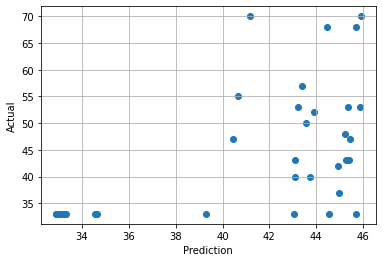

In [42]:
out = pd.DataFrame({'pred': RF_test_pred, 'target': Y})

plt.scatter('pred', 'target', data = out)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.grid()
plt.show()

In [26]:
RF_grid_search.best_params_

{'max_depth': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 300}

In [28]:
RF_grid_search.best_params_

{'max_depth': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 300}

In [19]:
RF_md

RandomForestRegressor(max_depth=7, min_samples_leaf=5, min_samples_split=10)

In [14]:
RF_grid_search.best_params_

{'max_depth': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 100}

In [2]:
validation.head()

,row_id,time,x,y,direction,congestion,congestion_pred_1,congestion_pred_2,congestion_pred_3,congestion_pred_4
0,846495,1991-09-30 00:00:00,0,0,EB,33,39.661178,39.682927,38.250197,37.643880
1,846560,1991-09-30 00:20:00,0,0,EB,33,39.713862,40.000000,38.736305,37.730434
2,846625,1991-09-30 00:40:00,0,0,EB,33,39.872391,39.727273,39.631089,37.910370
3,846690,1991-09-30 01:00:00,0,0,EB,33,39.977422,39.440000,40.875726,37.935738
4,846755,1991-09-30 01:20:00,0,0,EB,33,39.730986,39.949153,42.377400,37.982544


In [3]:
test.head()

,row_id,time,x,y,direction,congestion_pred_1,congestion_pred_2,congestion_pred_3,congestion_pred_4
0,848835,1991-09-30 12:00:00,0,0,EB,48.981912,49.189163,49.017353,45.011130
1,848900,1991-09-30 12:20:00,0,0,EB,48.964293,49.189163,49.192940,44.354027
2,848965,1991-09-30 12:40:00,0,0,EB,50.344437,51.245642,49.560480,46.279410
3,849030,1991-09-30 13:00:00,0,0,EB,52.420165,54.218750,50.099945,48.843200
4,849095,1991-09-30 13:20:00,0,0,EB,49.834319,49.478041,50.767148,46.702070
